# Finding the 2 Best Markets to Advertise in an E-Learning Product

### Introduction
We're working for an e-learning company that offers courses in programming. Most of our courses are on the web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. **Our goal in this project is to find out the two best markets to advertise our product in.**

To identify the best markets to promote the courses, following becomes pre-requisite information about the potential learners, for the E-Learning company:
<ul>
    <li>What people actually want to study - most preferred courses/ roles?</li>
    <li>What is the economic investment range - how much money, learners are willing to invest in online education?</li>
    <li>Investments in terms of time - the duration of time learners would like to spend in courses.</li>
    <li>Demographic information such as their current residence, current employment status and its type, educational qualifications etc.</li>
</ul>


### Analyzed Dataset
The above and related information was collected by the E-Learning platform <a href="https://www.freecodecamp.org/">freeCodeCamp</a> in a survey, they conducted in 2017. Since the freeCodeCamp runs a <a href="https://www.freecodecamp.org/news/">popular Medium Publication</a> with over 400,000 followers, they received responses from coders/learners with diversified interests and not just web development. They made the results as well as the data of this survey available under free distribution license.

The e-learning company intends to utilize this survey data, instead of conducting a new one - for both economic reasons and also the variety of responses available in the dataset. The dataset is freely available <a href="https://github.com/freeCodeCamp/2017-new-coder-survey">github/freeCodeCamp</a> .

### Results Summary

After analyzing the survey data from new coders to find the best two markets to advertise in. The solid conclusion reached is that the first market was the E-learning (offering a service of 59 dollars per month) company should advertise in is the United States of America where learners are willing to pay an approximate amount of $143 per month.

For the second-best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results of the analysis to the marketing team and collaborate. Their domain knowledge can help the company too to make the best decision.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Functions

In [2]:
def plot_horizontal_bar(series, title, xlabel, ytlabels, sigbar_x=-4.1):    
    fig, ax = plt.subplots(figsize=(20,10))
    series.sort_index().plot.barh(color='tab:blue')
    ax.set_title(title, y = 1.07)
    ax.set_xlabel(xlabel, fontsize=19)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
    ax.set_yticklabels(ytlabels)
    for side in ['top', 'right', 'left']:
        ax.spines[side].set_visible(False)
    # Generate a bolded horizontal line at y = 0
    plt.axvline(x = 0, color = 'black', linewidth = 1.3, alpha = .7)
    # The signature bar
    plt.text(x = sigbar_x, y = -0.75,
             s = ' ©Radu Spaimoc                                                                                                                                                                                                                                             Source: www.https://github.com/freeCodeCamp/',
             fontsize = 14,
             color = '#f0f0f0',
             backgroundcolor = 'grey')
    plt.show()  

In [3]:
def steam_plot(series, title, x_max, sigbar_x=-4.1):    
    fig, ax = plt.subplots(figsize=(20,10))
    ax.hlines(y=series.index, 
              xmin=0, xmax=series, 
              color='tab:blue', 
              linewidth=5)
    ax.plot(series, 
            series.index, 
            'o', 
            markersize=10,
            c='tab:blue',
           )
    ax.set_title(title,  y = 1.07)
    ax.set_xlim(0,x_max)
    ax.tick_params(axis='both', labelsize=16, left=False)
    for side in ['top', 'right']:
        ax.spines[side].set_visible(False)
        
    # Generate a bolded horizontal line at y = 0
    plt.axvline(x = 0, color = 'black', linewidth = 6,)
    # The signature bar
    plt.text(x = sigbar_x, y = -0.75,
             s = ' ©Radu Spaimoc                                                                                                                                                                                                                                             Source: www.https://github.com/freeCodeCamp/',
             fontsize = 14,
             color = '#f0f0f0',
             backgroundcolor = 'grey')
    plt.show()  

In [4]:
def create_box_plot(y, x, roles_df, sigbar_x=-17500):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 10))
    sns.boxplot(ax=ax, y=y, data = roles_df, x=x)
    ax.set_ylabel("") 
    ax.set_xlabel("$ Invested / Month", fontsize = "large")
    ax.set_title("Dispersion of Investment", fontsize = "x-large")
    # Generate a bolded horizontal line at y = 0
    plt.axvline(x = 0, color = 'black', linewidth = 1,)
    # The signature bar
    plt.text(x = sigbar_x, y = -0.75,
             s = ' ©Radu Spaimoc                                                                                                                                                                                                                                             Source: www.https://github.com/freeCodeCamp/',
             fontsize = 14,
             color = '#f0f0f0',
             backgroundcolor = 'grey')
    plt.show()  

# Reading the Data

In [5]:
df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

In [6]:
df

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18170,41.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,never see,NaN,NaN
18171,31.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18172,39.0,0.0,NaN,NaN,NaN,NaN,3.0,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
18173,54.0,0.0,NaN,NaN,NaN,NaN,3.0,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN


In [7]:
df.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,...,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston
count,15367.000000,17709.000000,1069.000000,1079.000000,1073.000000,2314.000000,1609.0,165.0,1708.0,290.0,...,993.0,6036.0,1261.0,3539.0,2662.0,1396.0,3327.0,622.0,201.0,2960.0
mean,27.691872,0.062002,0.699719,0.305839,0.818267,1.832325,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,8.559239,0.241167,0.458594,0.460975,0.385805,0.972813,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,22.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,26.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,32.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,90.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [9]:
df.isna().sum()

Age                     2808
AttendedBootcamp         466
BootcampFinish         17106
BootcampLoanYesNo      17096
BootcampName           17226
                       ...  
YouTubeMIT             14848
YouTubeMozillaHacks    17553
YouTubeOther           16961
YouTubeSimplilearn     17974
YouTubeTheNewBoston    15215
Length: 136, dtype: int64

In [10]:
round(df.isnull().sum()*100 / len(df), 2)

Age                    15.45
AttendedBootcamp        2.56
BootcampFinish         94.12
BootcampLoanYesNo      94.06
BootcampName           94.78
                       ...  
YouTubeMIT             81.69
YouTubeMozillaHacks    96.58
YouTubeOther           93.32
YouTubeSimplilearn     98.89
YouTubeTheNewBoston    83.71
Length: 136, dtype: float64

In [11]:
len(df.isna().sum() > 0)

136

In [12]:
aux = df.isna().sum()
len(aux[df.isna().sum().values > 0])

132

From the previous analysis were made different observations. The dataset is formed by **18175 entries** (rows) and **136 features** (columns). It seems that **132** of **136**  columns contain **null** values, but what may difficult in our analysis scope is that there are columns that have more than **90%** of null values.

We don't have any clear documentation describing each column, unfortunately most column names are rather self-explanatory, and also the raw-data folder of the dataset repository contains the initial survey questions. From this information, we can conclude that the predominant majority of columns don't represent any interest for our analysis goal because of:
<ul>
    <li><b>Irrelevance:</b> Columns like HasServedInMilitary, CityPopulation, IsEthnicMinority..etc. Are irrelevant for our analysis scope.</li>
    <li><b>Refferring to previous additional learning resources</b> Columns like Podcast..., CodeEvent..., Resource..., YouTube...etc. Which is rather relative, since one source can be extremely helpful for one person while totally useless for another.</li>
</ul>  

We conclude that the relevant columns for our analysis goal are: 
<ul>
    <li>Age</li>
    <li>AttendedBootcamp</li>
    <li>CountryCitizen</li>
    <li>CountryLive</li>
    <li>EmploymentField</li>
    <li>EmploymentStatus</li>
    <li>Gender</li>
    <li>HasChildren</li>
    <li>HasDebt</li>
    <li>HasFinancialDependents</li>
    <li>HasHomeMortgage</li>
    <li>HasStudentDebt</li>
    <li>HoursLearning</li>
    <li>Income</li>
    <li>JobRoleInterest</li>
    <li>MaritalStatus</li>
    <li>MoneyForLearning</li>
    <li>MonthsProgramming</li>
    <li>SchoolDegree</li>
    <li>SchoolMajor</li>      
</ul>

In [13]:
df = df[['Age', 'AttendedBootcamp', 'CountryCitizen', 'CountryLive', 
         'EmploymentField', 'EmploymentStatus', 'Gender', 'HasChildren', 
         'HasDebt', 'HasFinancialDependents', 'HasHomeMortgage', 
         'HasStudentDebt', 'HoursLearning', 'Income', 'JobRoleInterest',
         'MaritalStatus', 'MoneyForLearning', 'MonthsProgramming', 
         'SchoolDegree', 'SchoolMajor']]

In [14]:
round(df.isnull().sum()*100 / len(df), 2)

Age                       15.45
AttendedBootcamp           2.56
CountryCitizen            15.37
CountryLive               15.62
EmploymentField           55.35
EmploymentStatus          21.07
Gender                    14.97
HasChildren               78.77
HasDebt                   15.87
HasFinancialDependents    15.66
HasHomeMortgage           64.80
HasStudentDebt            64.78
HoursLearning              8.04
Income                    58.06
JobRoleInterest           61.53
MaritalStatus             15.63
MoneyForLearning           8.79
MonthsProgramming          6.00
SchoolDegree              15.44
SchoolMajor               51.98
dtype: float64

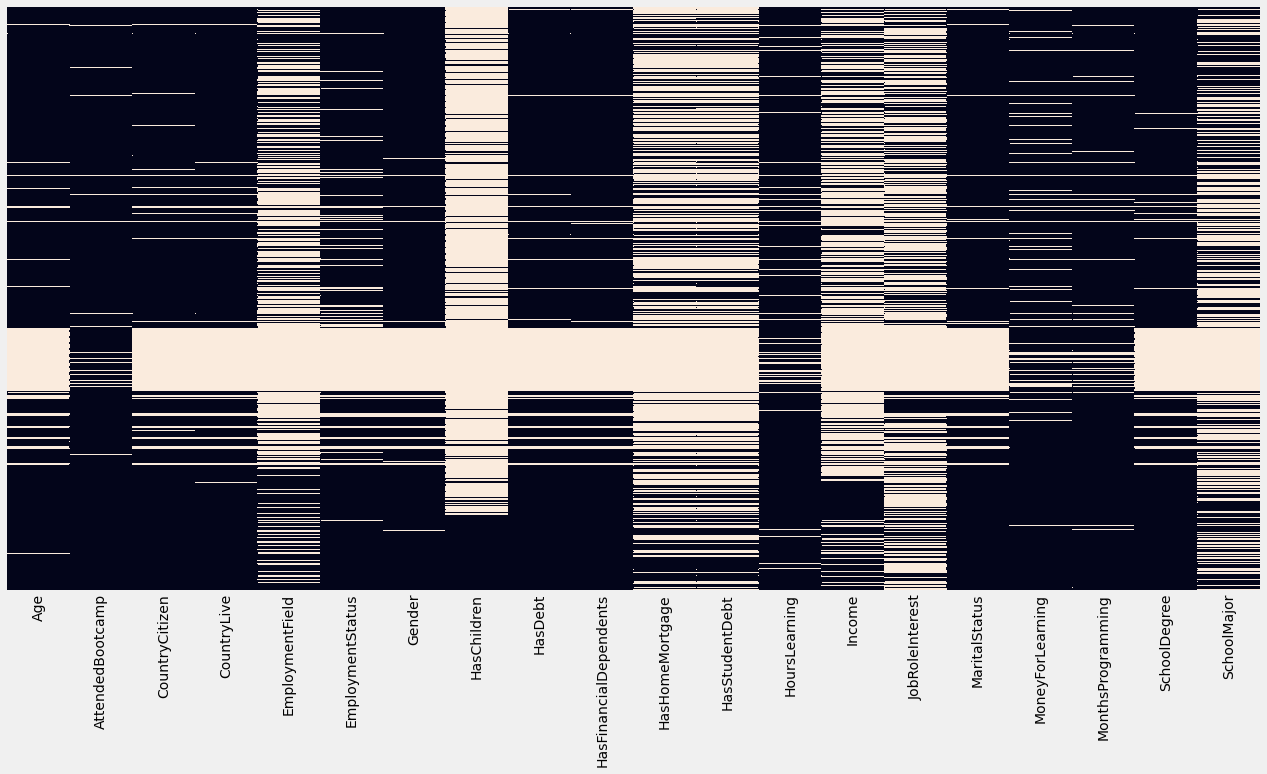

In [15]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 10))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False);
plt.show()

From the previous chart we can conclude that the reduced dataset still having missing values for different columns like: **EmploymentField, HasChildren, HasHomeMortgage, HasStudentDebt, Income, JobRoleInterest, SchoolMajor** where the percentage of the missing values is bigger tha **50%**.

# Sample Representativity

Most of the courses that the company offers are on the web and mobile development, but we also cover many other domains, like data science, game development, etc. For our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:
<ul>
    <li>Where are these new coders located?</li>
    <li>What are the locations with the greatest number of new coders?</li>
    <li>How much money new coders are willing to spend on learning?</li>
</ul>

First, let's figure out whether the sample we have is representative for our population of interest. **JobRoleInterest** contains the role or roles that each respondet is interested in. 

In [16]:
df["JobRoleInterest"]

0                                                      NaN
1                                 Full-Stack Web Developer
2          Front-End Web Developer, Back-End Web Develo...
3          Front-End Web Developer, Full-Stack Web Deve...
4        Full-Stack Web Developer, Information Security...
                               ...                        
18170                                                  NaN
18171      DevOps / SysAdmin,   Mobile Developer,   Pro...
18172                                                  NaN
18173                                                  NaN
18174    Back-End Web Developer, Data Engineer,   Data ...
Name: JobRoleInterest, Length: 18175, dtype: object

In [17]:
df["JobRoleInterest"].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                        11.770595
  Front-End Web Developer                                                                                                                                                        6.435927
  Data Scientist                                                                                                                                                                 2.173913
Back-End Web Developer                                                                                                                                                           2.030892
  Mobile Developer                                                                                                                                                               1.673341
                                                                      

From a first glance, we can see that most people are interested in a web related job like Full-Stack, Front-End and Backen-End.
We can observe that people are also interested in several job roles. Let's analyze deeper this percentages:

In [18]:
roles_df = df.dropna(subset=["JobRoleInterest"]).copy()
roles_df["JobRoleInterest"] = roles_df["JobRoleInterest"].str.split(',')
roles_df["SeveralRoles"] = roles_df["JobRoleInterest"].apply(lambda x: True if len(x) > 1 else False)
roles_df["SeveralRoles"].value_counts(dropna=False)

True     4779
False    2213
Name: SeveralRoles, dtype: int64

In [19]:
round(roles_df["SeveralRoles"].value_counts(normalize=True) * 100, 2)

True     68.35
False    31.65
Name: SeveralRoles, dtype: float64

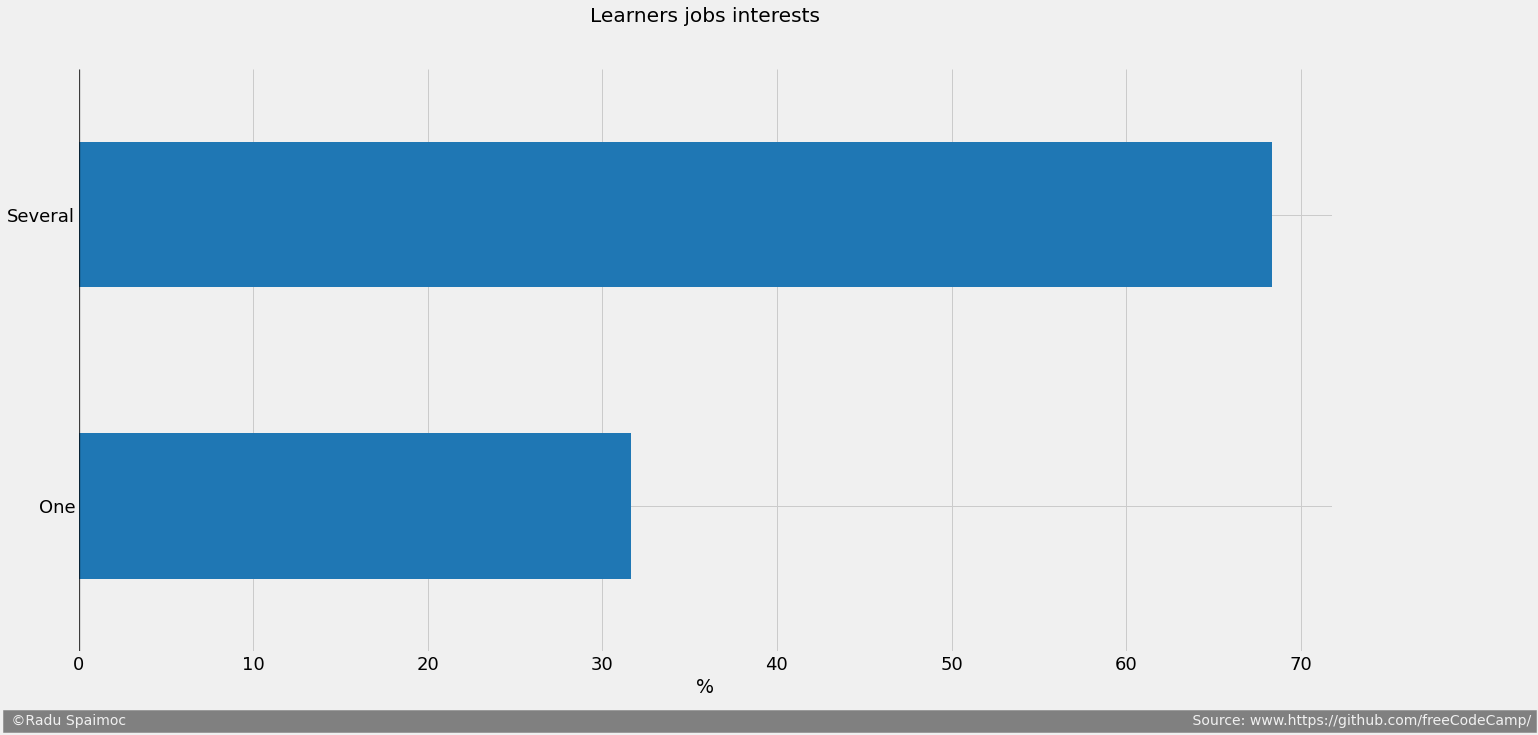

In [20]:
plot_horizontal_bar(round(roles_df["SeveralRoles"].value_counts(normalize=True) * 100, 2), 
                    title='Learners jobs interests',
                    xlabel='%',
                    ytlabels=['One', 'Several'])

As it's shown in the previous chart **68.35%** of the learners are interested in more than one role job. This tendency is an advantage for the e-learning company that offers different courses, if the student is satisfied with the received service may complete several courses.

The company's focus is on web and mobile development courses. Let's check how many people are interested in at least one of these two subjects:

In [21]:
round(df["JobRoleInterest"].str.contains('Web Developer|Mobile Developer').value_counts(normalize=True) * 100, 2)

True     86.24
False    13.76
Name: JobRoleInterest, dtype: float64

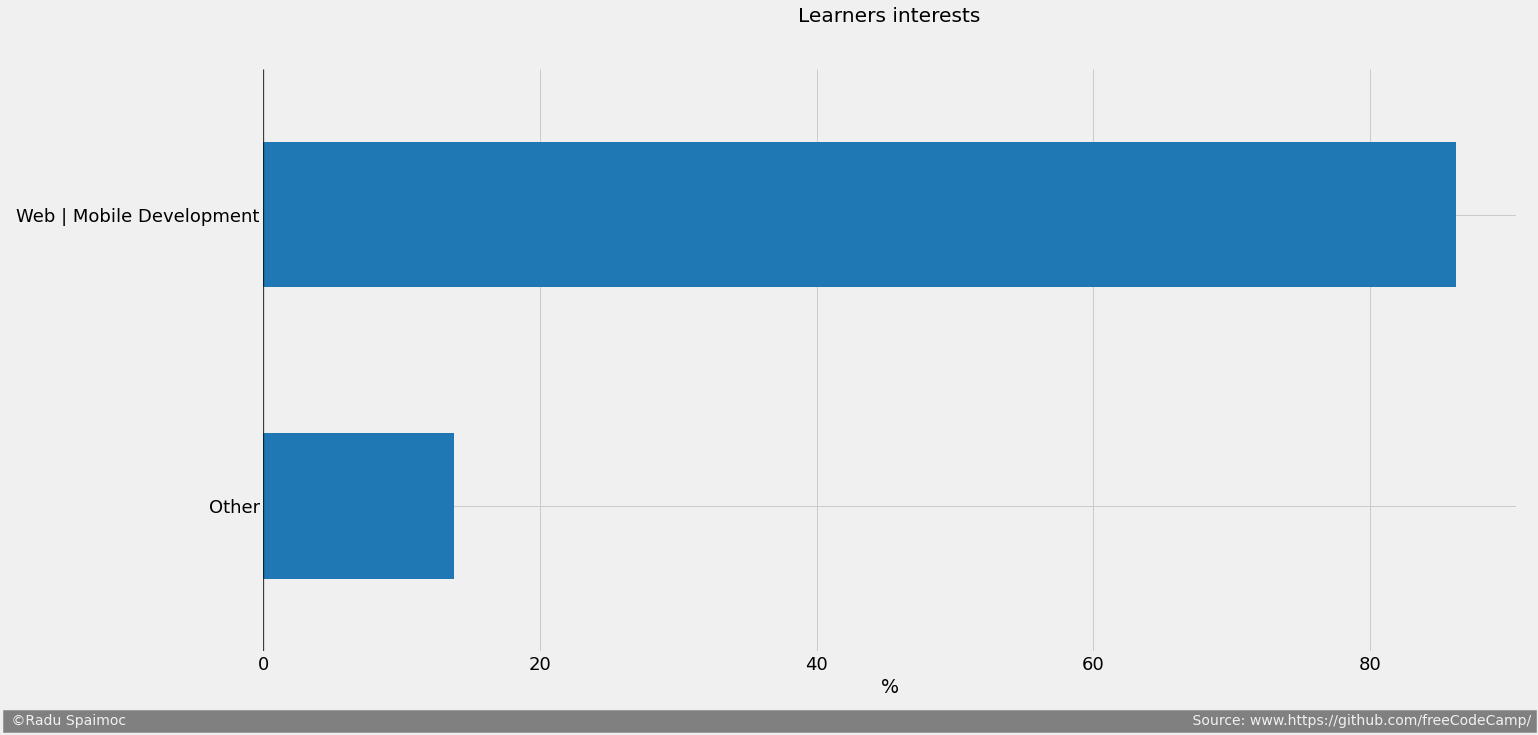

In [22]:
plot_horizontal_bar(round(df["JobRoleInterest"].str.contains('Web Developer|Mobile Developer').value_counts(normalize=True) * 100, 2),
                    title='Learners interests',
                    xlabel='%',
                    ytlabels=['Other', 'Web | Mobile Development',],
                   sigbar_x=-18.5)

As it is shown on the previous chart, we can conclude that the predominant majority of the respondents are interested in **Web or Mobile Development (86%)**. 

This insight makes our sample data representative of the target audience of the e-learning company. Having confirmed that the sample is representative of the whole population, let's start the data analysis.

# Best Markets By Country

The data set provides information about the location of each participant at a country level. The CountryCitizen variable describes the country of origin for each participant, and the CountryLive variable describes what country each participant lives in (which may be different than the origin country).

For our analysis, we'll work with the CountryLive variable because we're interested in where people live at the moment when we run the ads. In other words, we're interested where people are located, not where they were born.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the best countries to advertise in.

### Locations and Densities of New Learners

In [23]:
roles_df["CountryLive"].value_counts(dropna=False)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
NaN                          154
                            ... 
Sudan                          1
Angola                         1
Botswana                       1
Aruba                          1
Bolivia                        1
Name: CountryLive, Length: 138, dtype: int64

In [24]:
country_freq = round(roles_df["CountryLive"].value_counts(normalize=True) * 100, 2)
country_freq

United States of America    45.70
India                        7.72
United Kingdom               4.61
Canada                       3.80
Poland                       1.92
                            ...  
Angola                       0.01
Cayman Islands               0.01
Botswana                     0.01
Aruba                        0.01
Yemen                        0.01
Name: CountryLive, Length: 137, dtype: float64

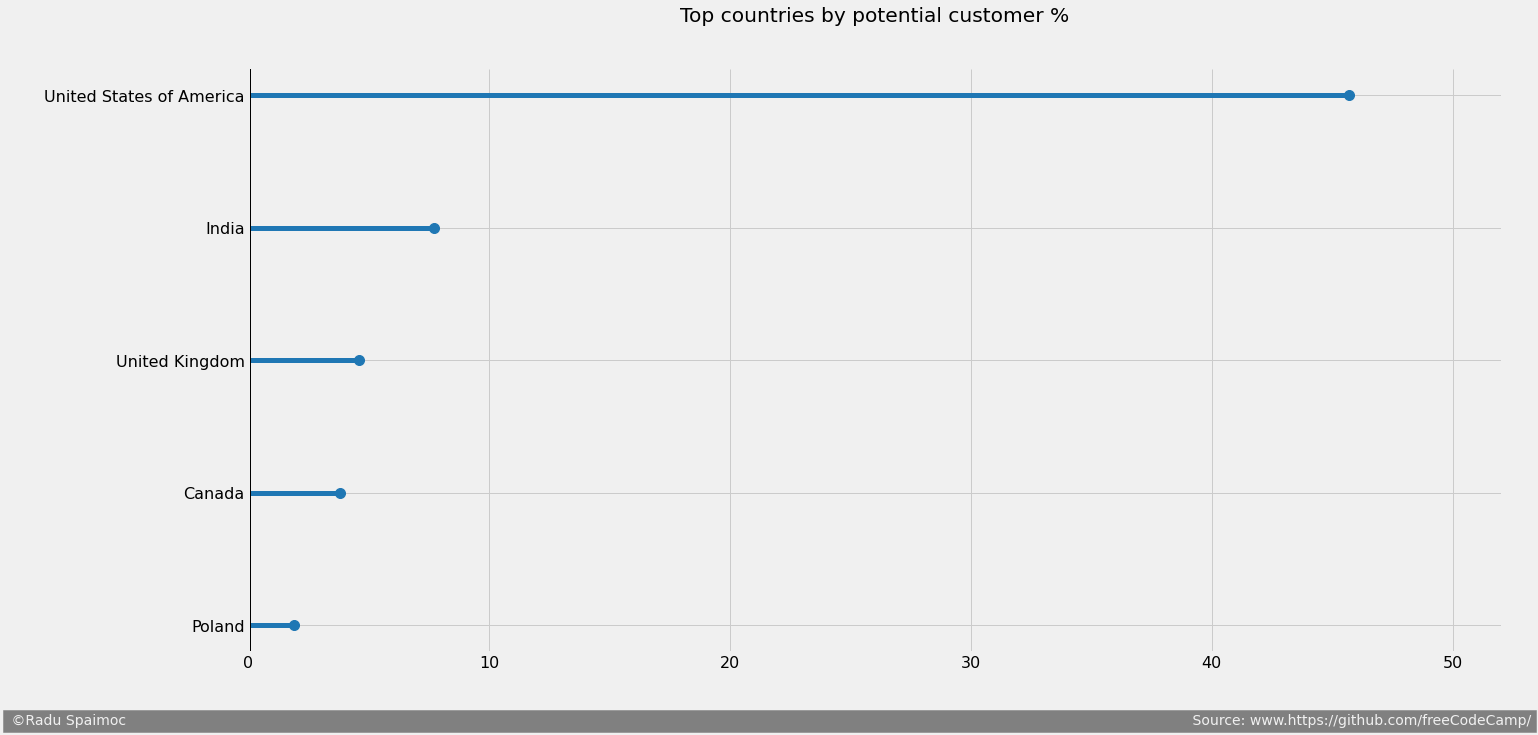

In [25]:
steam_plot(series=country_freq.iloc[:5].sort_values(),
           title='Top countries by potential customer %',
           x_max=52, 
           sigbar_x=-10)   

As it's shown in the previous chart the **46%** of the potential customers live in **United States of America**. So we can consider this country as the best market to choose for advertisement. However, as is shown in the chart and the previous frequencies lists, we can't be sure about second and third best markets, event tough **India** is the second, a low percentage of potential customers live there. Also, the third market **United Kingdom** with **4.61%** is close to the fourth **Canada** with **3.80**.

We found a piece of useful information about learners' locations, now before making a decision we need a deeper analysis.

### Money Spent For Learning

We can continue by figuring out how much money new coders are willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for the e-learn company.

The **MoneyForLearning** column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of **59** dollars per month, and for this reason, we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:
<ul>
    <li>These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.</li>
    <li>Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.</li>
</ul>

First, let's compute the amount of money that each student has spent per mounth:

In [26]:
roles_df[['MoneyForLearning', 'MonthsProgramming']]

,MoneyForLearning,MonthsProgramming
1,80.0,6.0
2,1000.0,5.0
3,0.0,5.0
4,0.0,24.0
6,0.0,12.0
...,...,...
18161,0.0,6.0
18162,0.0,84.0
18163,0.0,NaN
18171,10000.0,1.0


In [27]:
roles_df["MonthsProgramming"] = roles_df["MonthsProgramming"].apply(lambda x: 1 if x==0 else x)
roles_df["MoneyPerMonth"] = roles_df["MoneyForLearning"] / roles_df["MonthsProgramming"]
roles_df[['MoneyForLearning', 'MonthsProgramming', 'MoneyPerMonth']]

,MoneyForLearning,MonthsProgramming,MoneyPerMonth
1,80.0,6.0,13.333333
2,1000.0,5.0,200.000000
3,0.0,5.0,0.000000
4,0.0,24.0,0.000000
6,0.0,12.0,0.000000
...,...,...,...
18161,0.0,6.0,0.000000
18162,0.0,84.0,0.000000
18163,0.0,NaN,NaN
18171,10000.0,1.0,10000.000000


Since in the next steps of the analysis are needed extactly the information about the country and money per month invested by the learner, the rows with missing values in the **MoneyPerMonth** and **CountryLive** columns will be discarded.

In [28]:
roles_df = roles_df.dropna(subset=["MoneyPerMonth", "CountryLive"])

Now, let's find out how much money a student spends on average each month in the US, India, the United Kingdom and Canada.

In [29]:
roles_df["CountryLive"].unique().tolist()

['United States of America',
 'Brazil',
 'Portugal',
 'United Kingdom',
 'Mexico',
 'Germany',
 'Argentina',
 'Venezuela',
 'India',
 'Canada',
 'Australia',
 'Egypt',
 'Lithuania',
 'Finland',
 'Bosnia & Herzegovina',
 'Netherlands (Holland, Europe)',
 'Kenya',
 'Switzerland',
 'Italy',
 'Great Britain',
 'Russia',
 'China',
 'Spain',
 'Ireland',
 'Poland',
 'France',
 'Kyrgyzstan',
 'Greece',
 'Philippines',
 'Georgia',
 'Turkey',
 'Romania',
 'Norway',
 'Nigeria',
 'Peru',
 'Iraq',
 'Sweden',
 'Bulgaria',
 'Singapore',
 'Ukraine',
 'Hungary',
 'Austria',
 'New Zealand',
 'Serbia',
 'Bangladesh',
 'Honduras',
 'Belgium',
 'Puerto Rico',
 'Denmark',
 'Japan',
 'Cyprus',
 'Ghana',
 'Czech Republic',
 'Macedonia',
 'Costa Rica',
 'Tunisia',
 'South Africa',
 'Albania',
 'Malaysia',
 'Thailand',
 'Iceland',
 'Pakistan',
 'Guam',
 'Indonesia',
 'Algeria',
 'Senegal',
 'Belarus',
 'Sri Lanka',
 'Israel',
 'United Arab Emirates',
 'Virgin Islands (USA)',
 'Turkmenistan',
 'Botswana',
 'Croa

In [30]:
roles_df = roles_df[roles_df["CountryLive"].isin(['United States of America', 'United Kingdom', 'Canada', 'India'])]

In [31]:
pd.DataFrame(round(roles_df.groupby("CountryLive")["MoneyPerMonth"].mean().sort_values(), 2))

,MoneyPerMonth
CountryLive,
United Kingdom,45.53
Canada,113.51
India,135.10
United States of America,228.00


In [32]:
pd.DataFrame(round(roles_df.groupby("CountryLive")["MoneyPerMonth"].median().sort_values(), 2))

,MoneyPerMonth
CountryLive,
Canada,0.00
India,0.00
United Kingdom,0.00
United States of America,3.33


From the listed **means** for each country, we can observe that **United Kingdom** and **Canada** means are surprisingly low relative to the values we see for **India**. If we considered a few socio-economical metrics (like <a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita#Lists_of_countries_and_dependencies">GDP per capita</a>), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India. It might be that we don't have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

From the **median** for the **MoneyPerMounth** spent for each country, we can see that at the moment of the survey at least half of the potential customers in Canada, India, and United Kingdom had spent nothing on their learning resources. This fact means that probably these learners are learning to program from free platforms like Youtube or other resources. Statistically speaking, the resulting median values show that the distributions of money per month for each country are severely right-skewed, most probably with a lot of upper outliers, and the mean values strongly influenced by both very high values of the upper outliers and a huge amount of 0 values in the distribution.

### Identify Extreme Outliers

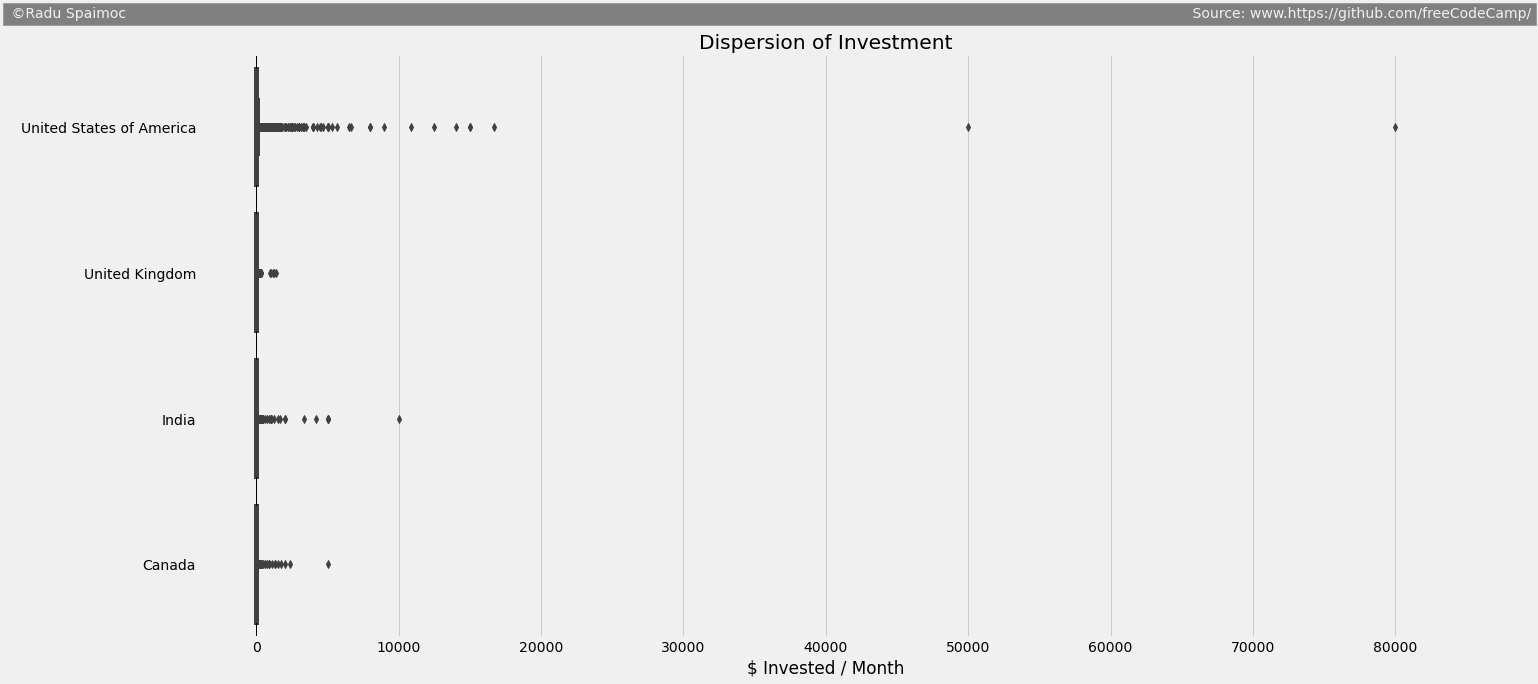

In [33]:
create_box_plot("CountryLive", "MoneyPerMonth", roles_df, sigbar_x=-17500)

USA shows two extremely high value for Investments made per month. Although possible, these values seem unlikely and hence are eliminated outright.

In [34]:
roles_df = roles_df[roles_df["MoneyPerMonth"] < 20000]

Now let's recompute the mean values and plot the box plots again.

In [35]:
pd.DataFrame(round(roles_df.groupby("CountryLive")["MoneyPerMonth"].mean().sort_values(), 2))

,MoneyPerMonth
CountryLive,
United Kingdom,45.53
Canada,113.51
India,135.10
United States of America,183.80


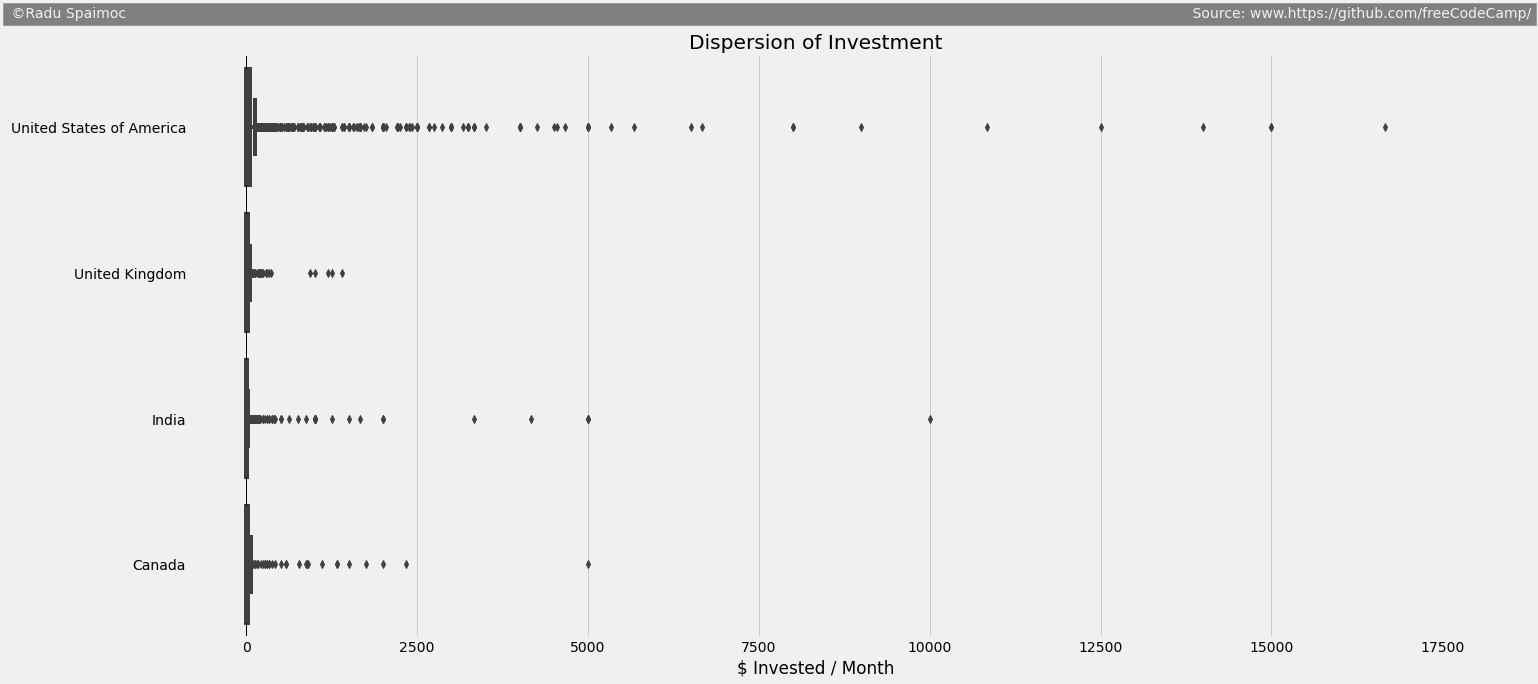

In [36]:
create_box_plot("CountryLive", "MoneyPerMonth", roles_df, sigbar_x=-3500)

Exceptuating **United Kingdom** in the previous box plot all the countries have outliers, in the next section each country outliers will be analyzed deeply.

### Examining United States Outliers

In the box plot above, we can see more extreme outliers for the US (values over **6000** dollars per month). Let's examine these participants in more detail.

In [37]:
roles_df[(roles_df["CountryLive"] == "United States of America") & 
         (roles_df["MoneyPerMonth"] >= 6000)][['AttendedBootcamp', 'EmploymentField', 'EmploymentStatus', 'HasDebt', 'HoursLearning']]

,AttendedBootcamp,EmploymentField,EmploymentStatus,HasDebt,HoursLearning
718,1.0,architecture or physical engineering,Employed for wages,0.0,35.0
1222,1.0,NaN,Not working and not looking for work,1.0,50.0
3184,1.0,software development and IT,Employed for wages,0.0,10.0
3930,0.0,NaN,Not working and not looking for work,1.0,50.0
6805,1.0,NaN,Not working but looking for work,1.0,45.0
7198,0.0,education,Employed for wages,1.0,4.0
7505,1.0,NaN,Not working but looking for work,1.0,40.0
9778,1.0,education,Employed for wages,1.0,40.0
16650,0.0,NaN,Not working but looking for work,1.0,40.0
16997,0.0,health care,Employed for wages,1.0,12.0


Out of these **11** extreme outliers, six people attended boot camps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported that they spend **6000** dollars each month, but they have never attended a boot camp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a boot camp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower. As a consequence, we'll remove all these eight outliers.

In the next code block, we'll remove respondents that:
<ul>
    <li>Didn't attend bootcamps.</li>
    <li>Had been programming for three months or less when at the time they completed the survey.</li>
<ul>

In [38]:
# Remove the respondents who didn't attendent a bootcamp
no_bootcamp = roles_df[
    (roles_df['CountryLive'] == 'United States of America') & 
    (roles_df['MoneyPerMonth'] >= 6000) &
    (roles_df['AttendedBootcamp'] == 0)
]

roles_df = roles_df.drop(no_bootcamp.index)


# Remove the respondents that had been programming for less than 3 months
less_than_3_months = roles_df[
    (roles_df['CountryLive'] == 'United States of America') & 
    (roles_df['MoneyPerMonth'] >= 6000) &
    (roles_df['MonthsProgramming'] <= 3)
]

roles_df = roles_df.drop(less_than_3_months.index)

### Examining India Outliers

In the previous boxplot, we can see a few extreme outliers for India (values over **2500** dollars per month), but it's unclear whether this is good data or not. Maybe these persons attended several boot camps, which tend to be very expensive. Let's examine these two data points to see if we can find anything relevant.

In [39]:
roles_df[(roles_df["CountryLive"] == "India") & (roles_df["MoneyPerMonth"] >= 2500)]

,Age,AttendedBootcamp,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasChildren,HasDebt,HasFinancialDependents,...,HoursLearning,Income,JobRoleInterest,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,SeveralRoles,MoneyPerMonth
1728,24.0,0.0,India,India,NaN,A stay-at-home parent or homemaker,male,NaN,0.0,0.0,...,30.0,NaN,"[ User Experience Designer, Mobile Develop...","single, never married",20000.0,4.0,bachelor's degree,Computer Programming,True,5000.000000
1755,20.0,0.0,India,India,NaN,Not working and not looking for work,male,NaN,0.0,0.0,...,10.0,NaN,"[Information Security, Full-Stack Web Develop...","single, never married",50000.0,15.0,bachelor's degree,Computer Science,True,3333.333333
7989,28.0,0.0,India,India,software development and IT,Employed for wages,male,0.0,1.0,1.0,...,20.0,300000.0,"[ User Experience Designer, Back-End Web Dev...",married or domestic partnership,5000.0,1.0,bachelor's degree,Aerospace and Aeronautical Engineering,True,5000.000000
8126,22.0,0.0,India,India,NaN,Not working but looking for work,male,NaN,1.0,0.0,...,80.0,NaN,"[Back-End Web Developer, Full-Stack Web Devel...","single, never married",5000.0,1.0,bachelor's degree,Electrical and Electronics Engineering,True,5000.000000
13398,19.0,0.0,India,India,NaN,Unable to work,male,NaN,0.0,0.0,...,30.0,NaN,[ Mobile Developer],"single, never married",20000.0,2.0,bachelor's degree,Computer Science,False,10000.000000
15587,27.0,0.0,India,India,software development and IT,Employed for wages,male,0.0,1.0,1.0,...,36.0,60000.0,"[Full-Stack Web Developer, Data Scientist]","single, never married",100000.0,24.0,bachelor's degree,Communications,True,4166.666667


Overall, it's really hard to figure out from the data whether these persons spent that much money on learning. The actual question of the survey was **"Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?"**, so they might have misunderstood and thought university tuition is included. It seems reasonable to remove these rows.

In [40]:
roles_df = roles_df.drop(roles_df[(roles_df["CountryLive"] == "India") & (roles_df["MoneyPerMonth"] >= 2500)].index)

### Examining Canada Outliers

Examining againg the previous box plot, in case of Canada there is only a person who spends **5000** dollars per month. Let's examine this case.

In [41]:
roles_df[(roles_df['CountryLive'] == 'Canada') & (roles_df['MoneyPerMonth'] > 4500)]

,Age,AttendedBootcamp,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasChildren,HasDebt,HasFinancialDependents,...,HoursLearning,Income,JobRoleInterest,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,SeveralRoles,MoneyPerMonth
13659,24.0,1.0,Canada,Canada,finance,Employed for wages,male,NaN,1.0,0.0,...,10.0,140000.0,"[ Mobile Developer, Full-Stack Web Developer...","single, never married",10000.0,2.0,bachelor's degree,Finance,True,5000.0


Here, the situation is similar to some of the US respondents — this participant had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We'll take the same approach here as for the US and remove this outlier.

In [42]:
roles_df = roles_df.drop(roles_df[(roles_df['CountryLive'] == 'Canada') & (roles_df['MoneyPerMonth'] > 4500)].index)

## Statistics Without Extreme Outliers

Let's recompute the mean values and generate the final box plots.

In [43]:
pd.DataFrame(round(roles_df.groupby("CountryLive")["MoneyPerMonth"].mean().sort_values(), 2))

,MoneyPerMonth
CountryLive,
United Kingdom,45.53
India,65.76
Canada,93.07
United States of America,142.65


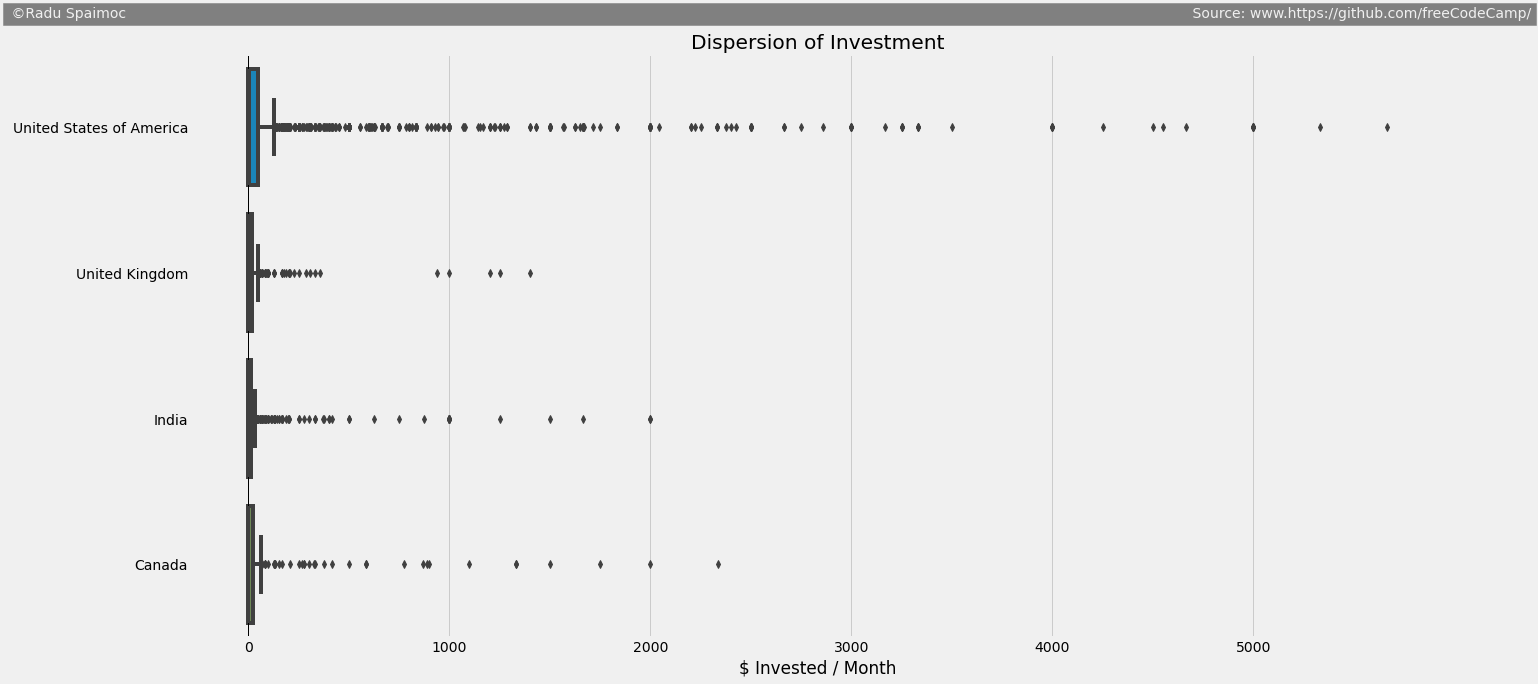

In [44]:
create_box_plot("CountryLive", "MoneyPerMonth", roles_df, sigbar_x=-1200)

# Conclusion - Choosing The Two Best Markets

As it's shown in the **Statistics Without Extreme Outliers** section, the first market where the E-learning company should advertise in is **United States of America** where learners are willing to pay an approximate amount of $143 per month.

The E-learn company sells subscriptions at a price of **59** dollars per month. From the previous section, we can discard **United Kingdom** since the learners are willing to pay only **45** dollars per month. 

In terms of money invested per month by a learner, Canada seems to be the best second choice since people are willing to pay **93** dollars per month. On the other hand **Indian** learners only **66**. Let's take a deeper look before deciding which market to chose.

As was shown in :

In [48]:
country_freq.iloc[:4].sort_values()

Canada                       3.80
United Kingdom               4.61
India                        7.72
United States of America    45.70
Name: CountryLive, dtype: float64

In terms of potential customers, **Untied States of America** is in the first place with **(46%)** followed by a big gap by **India** which has almost twice **(8%)** potential customers than Canada.

So it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might be a better choice because of the large number of potential customers.

As usual, after the analysis it seems that we have several options:
<ol>
    <li>Advertise in the <b>United States of America, India and Canada</b> by splitting the advertisement budget in different combinations.
      <ul>
          <li>As an example: 60% for the US, 25% for India and 15% for Canda. (Adjusting the percentages to the potencial customers numbers).</li>
      </ul>      
  </li>
    <li>Adverties only in the <b>United States of America and Canada</b>. Also, splitting the advertisment budget propotionally to the number of potentcial learners.
       <ul>
          <li>As an example: 65% for the US, 35% for Canada.</li>
      </ul> 
  </li>
   <li>Adverties only in the <b>United States of America and India</b>. Also, splitting the advertisment budget propotionally to the number of potentcial learners.
       <ul>
          <li>As an example: 70% for the US, 30% for India.</li>
      </ul> 
  </li>
</ol>

The advantage of working in an **E-learning** company is the collaboration between multidisciplinary teams. Having done this analysis, the next step will be to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.